# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from FLI import FLI
import numpy as np
import thr640
import time
import logging
import csv
import xarray as xr

In [3]:
# logger
logger = thr640.logger
camera = FLI()
step_motor = thr640.THR640()

In [ ]:
#step_motor.goto(490000)
#step_motor.waitUntilReady()

In [5]:
%run imaging_tool.py

exposure = 1 * 1e3 # ms
vbin = 1
attributes = {
    "temperature": camera.getTemperature(),
    "device_status": camera.getDeviceStatus(),
    "exposure": exposure,
    "frame_type": "light",
}

camera.setExposureTime(exposure)
camera.setVBin(vbin)
camera.setImageArea(10,0,2058,512//vbin)
time.sleep(.5)
camera.exposeFrame()
time.sleep(.1)
# load image
image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16))
# convert to xarray
data = xr.DataArray(
    image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes
)
# save data as NetCDF file
filepath = 'test.nc'
data.to_netcdf(filepath)

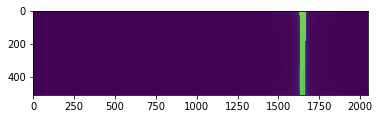

In [9]:
ds_disk = xr.open_dataset(filepath)
a = ds_disk.to_array()
imshow(a[0])